# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [28]:

# Import necessary libraries
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
# Set up Safari WebDriver
driver = webdriver.Safari()


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [11]:

# Visit the Mars weather data page
mars_temp_url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
driver.get(mars_temp_url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [12]:
# Get the page source and parse it using BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Close the browser once the data is scraped
driver.quit()

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Find the table containing the Mars weather data
table = soup.find('table', class_='table')

# Extract the headers
headers = [header.text for header in table.find_all('th')]

# Extract the rows of data
rows = table.find_all('tr')[1:]  # Skip the header row
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

In [14]:
# Create a DataFrame with the scraped data
mars_weather_df = pd.DataFrame(data, columns=headers)

In [16]:
# Display the first few rows of the DataFrame
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [17]:
# Examine data type of each column
print("\nData types before cleaning:")
print(mars_weather_df.dtypes)


Data types before cleaning:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [20]:
# Convert columns to appropriate data types
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [21]:
# Confirm type changes were successful by examining data types again
print("\nData types before cleaning:")
print(mars_weather_df.dtypes)



Data types before cleaning:
id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [22]:
# 1. How many months exist on Mars?
unique_months = mars_weather_df['month'].nunique()
print(f"Number of unique months on Mars: {unique_months}")

Number of unique months on Mars: 12


In [23]:

# 2. How many Martian days worth of data exist?
martian_days = mars_weather_df['sol'].nunique()
print(f"Number of Martian days in dataset: {martian_days}")


Number of Martian days in dataset: 1867


In [26]:
# 3. Coldest and Warmest Months on Mars (average minimum temperature)
avg_min_temp_per_month = mars_weather_df.groupby('month')['min_temp'].mean()
print(f"Average Martian temperature by month: {avg_min_temp_per_month}")

Average Martian temperature by month: month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


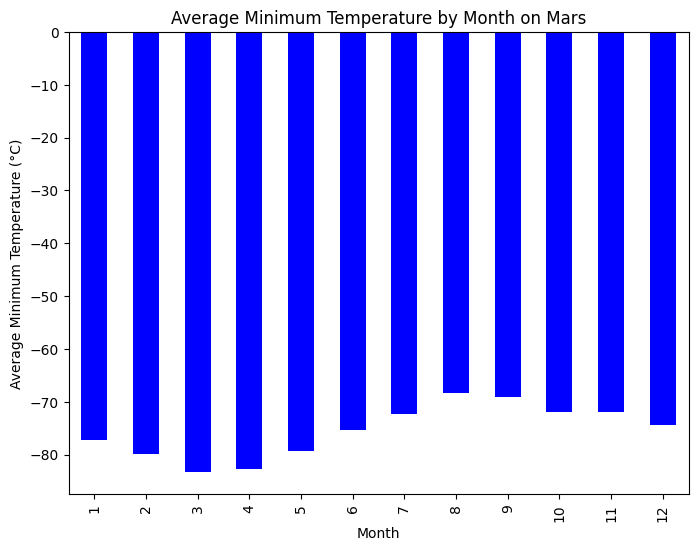

In [29]:
# Plot the average minimum temperature per month
plt.figure(figsize=(8, 6))
avg_min_temp_per_month.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()

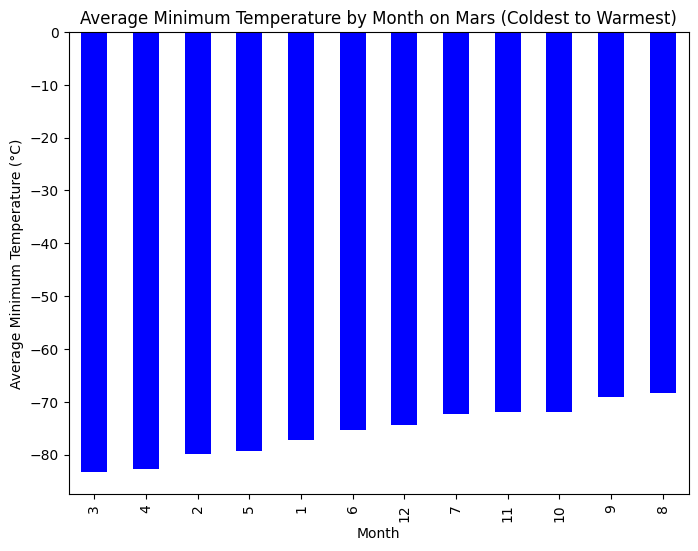

In [33]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph


# Sort the average minimum temperature by month (coldest to warmest)
sorted_avg_min_temp_per_month = avg_min_temp_per_month.sort_values()

# Plot the sorted average minimum temperature per month
plt.figure(figsize=(8, 6))
sorted_avg_min_temp_per_month.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature by Month on Mars (Coldest to Warmest)')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()




In [32]:
# 4. What is the average pressure by month?
avg_pressure_per_month = mars_weather_df.groupby('month')['pressure'].mean()
print(avg_pressure_per_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


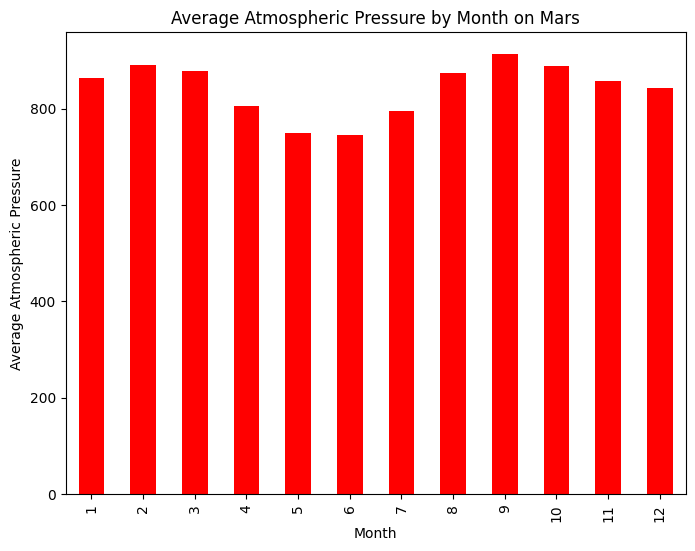

In [34]:
# Plot the average atmospheric pressure per month
plt.figure(figsize=(8, 6))
avg_pressure_per_month.plot(kind='bar', color='red')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.show()

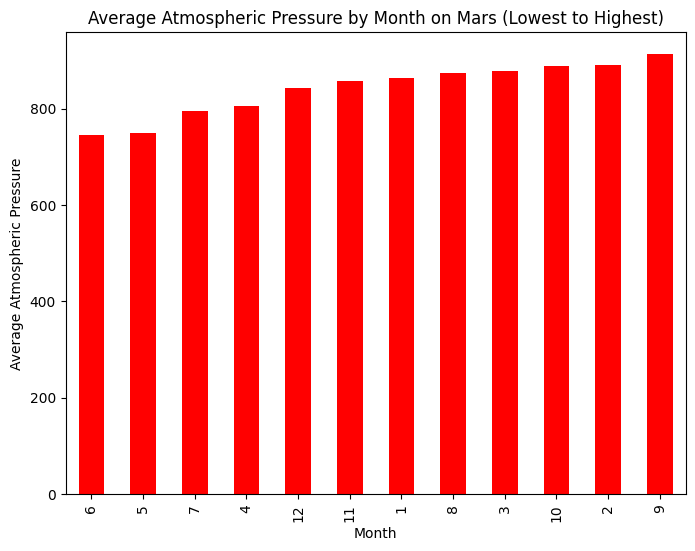

In [35]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the average minimum temperature by month (coldest to warmest)
sorted_avg_pressure_per_month = avg_pressure_per_month.sort_values()

# Plot the sorted average minimum temperature per month
plt.figure(figsize=(8, 6))
sorted_avg_pressure_per_month.plot(kind='bar', color='red')
plt.title('Average Atmospheric Pressure by Month on Mars (Lowest to Highest)')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.show()

<Figure size 1000x600 with 0 Axes>

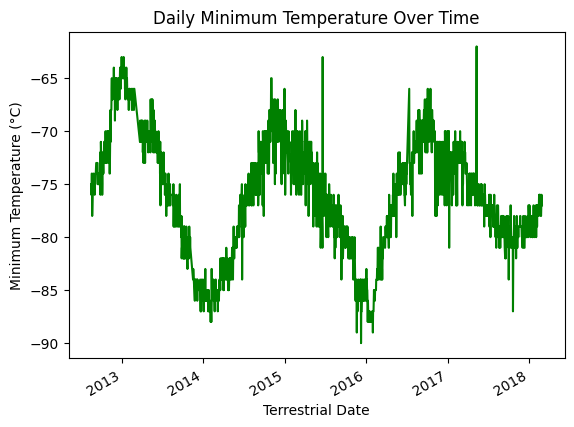

In [40]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

plt.figure(figsize=(10, 6))
mars_weather_df.plot(x='terrestrial_date', y='min_temp', title='Daily Minimum Temperature Over Time', legend=False, color='green')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.show()


#### Minimum Temperature

- Seasonal Changes: Mars exhibits significant seasonal temperature variations, with distinct colder and warmer months. The coldest months on Mars align with its winter, and the warmest months align with summer.

- Extreme Cold: Mars is an extremely cold planet, with temperatures often dipping well below -60°C, even during warmer months.

- Predictable Patterns: The temperature changes follow predictable patterns over time, which could be useful for planning future missions and understanding Martian climate behavior.

#### Atmospheric Pressure

Mars' atmospheric pressure varies with the seasons, peaking in colder months and dipping in warmer ones due to the CO₂ cycle. These variations, coupled with the planet's thin atmosphere, pose challenges for exploration and future missions.

#### Year Length

A Martian year is about 687 Earth days, and this can be estimated by analyzing the cyclical temperature and pressure changes that occur due to Mars' orbit around the Sun.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [41]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather.csv', index=False)
print("Data exported to 'mars_weather.csv'")

Data exported to 'mars_weather.csv'


In [42]:
driver.quit()